# Worked Problem 3: Analysing Electric Field of a Charged Hollow Sphere.

## Introduction

**System Description:** In this assignment, we aim to investigate the electric field of a uniformly charged hollow spherical shell. The sphere has a total charge $Q$ distributed evenly over its surface, and we are particularly interested in the electric field at various points in space both inside and outside the sphere.

The hollow sphere exhibits spherical symmetry, which simplifies the problem by allowing us to use Gauss's Law for calculating the electric field. According to Gauss's Law, the electric field inside a uniformly charged spherical shell should be zero, while outside the shell, the electric field behaves as if all the charge were concentrated at the center of the sphere. This scenario allows us to explore how the electric field transitions from being zero inside the sphere to following an inverse square law outside.
The main parameters of the system are:
* $R$: the radius of the spherical shell.

* $Q$: the total charge on the surface of the sphere.

* $k = 8.99 × 10^{-9}  \frac{Nm^2}{C^2}$ (Coulomb's constant).

* $r$: the radial distance from the center of the sphere to a point in space, where we will calculate the electric field.

The investigation will focus on visualizing the electric field using numerical methods in addition to comparing these results with the analytical predictions. We will extend our existing tools to plot the electric field lines in 3D and analyze the behavior of the field inside and outside the sphere

## Analytical Setup

To set up the analytical solution for the electric field, we can divide the problem into two regions:

1. **Inside the Hollow Sphere ($r≤R$)**:
By Gauss's Law, the electric field inside a uniformly charged hollow spherical shell is zero. This is because any Gaussian surface inside the shell encloses no charge, resulting in no net flux and thus no electric field inside the shell. Mathematically, 
$$
E_{inside} = 0 \quad (r \leq R)
$$
2. **Outside the Hollow Sphere ($r>R$)**: For points outside the spherical shell, the situation is equivalent to that of a point charge $Q$ located at the center of the sphere. According to Coulomb's Law, the electric field at a distance $r$ from the center is given by:
$$
E_{outside} = \frac{kQ}{R^2} \quad (r > R)
$$

These analytical results provide us with a framework for understanding the expected behavior of the electric field in both regions. In the next section, we will compare these analytical results with numerical simulations by calculating the electric field at various points in space and plotting the field lines.

## Numerical Methods to Calculate Electric Field and Visualization

In this cell, we will perform a numerical simulation to calculate the electric field at various points in space around a uniformly charged hollow spherical shell. We will use the following steps:

1. **Define Parameters**: Use the parameters we have defined above.

2. **Create a Grid**: Generate a grid of points in space where we will calculate the electric field.

3. **Calculate Electric Field**: Use the analytical expressions derived earlier to compute the electric field at each point on the grid. Specifically:
   - For points inside the sphere ($ r \leq R $), the electric field is zero.
   - For points outside the sphere ($ r > R $), the electric field is calculated using $ E = \frac{kQ}{r^2} $.
   
4. **Visualize the Field**: Plot the electric field lines to visualize the behavior of the field inside and outside the spherical shell.

This approach allows us to compare the numerical results with the analytical predictions and gain a deeper understanding of the electric field distribution around a charged hollow sphere.

(-2.0, 2.0)

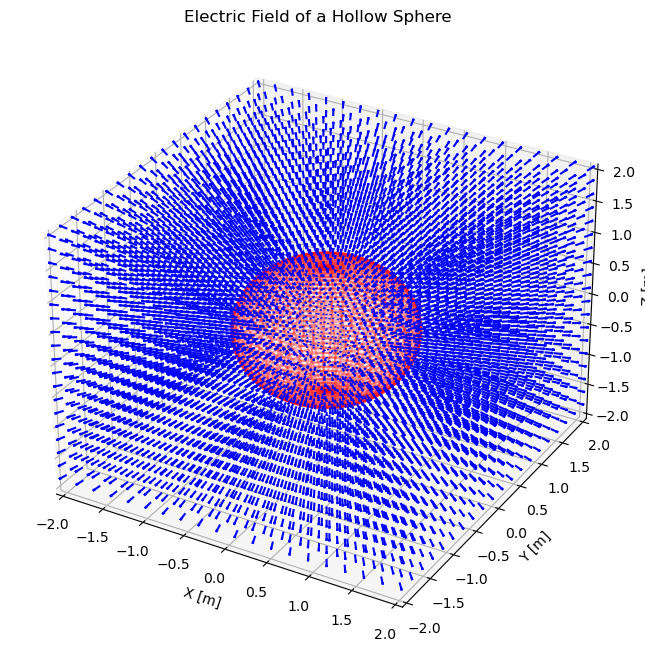

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
k = 8.99e9  # Coulomb's constant in N*m^2/C^2
Q = 1e-6    # Total charge on the sphere in Coulombs
R = 1.0     # Radius of the sphere in meters

# Grid for plotting
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
z = np.linspace(-2, 2, 20)

X, Y, Z = np.meshgrid(x, y, z)

# Calculate the electric field due to a charged hollow sphere
def electric_field_hollow_sphere(Q, R, X, Y, Z):
    E_x = np.zeros_like(X)
    E_y = np.zeros_like(Y)
    E_z = np.zeros_like(Z)
    
    for i in range(X.shape[0]):
        for j in range(Y.shape[1]):
            for k in range(Z.shape[2]):
                r = np.sqrt(X[i,j,k]**2 + Y[i,j,k]**2 + Z[i,j,k]**2)  # Distance from the center
                
                if r > R:  # Outside the sphere
                    E_magnitude = k * Q / r**2
                    E_x[i,j,k] = E_magnitude * X[i,j,k] / r
                    E_y[i,j,k] = E_magnitude * Y[i,j,k] / r
                    E_z[i,j,k] = E_magnitude * Z[i,j,k] / r
                else:  # Inside the sphere (Electric field is zero)
                    E_x[i,j,k] = 0
                    E_y[i,j,k] = 0
                    E_z[i,j,k] = 0

    return E_x, E_y, E_z

E_x, E_y, E_z = electric_field_hollow_sphere(Q, R, X, Y, Z)

# Create a meshgrid for the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
sphere_x = R * np.outer(np.cos(u), np.sin(v))
sphere_y = R * np.outer(np.sin(u), np.sin(v))
sphere_z = R * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the electric field
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(X, Y, Z, E_x, E_y, E_z, length=0.1, normalize=True, color='b')

# Plot the sphere outline
ax.plot_wireframe(sphere_x, sphere_y, sphere_z, color='r', alpha=0.3)

# Customize the plot
ax.set_title('Electric Field of a Hollow Sphere')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])


## Comparing Numerical Results vs. Analytical Results

We will take two cases: 

1. **When $r = 2R$**: We calculate the field using both methods at this point. We assume the assumption that we can treat the sphere as a point charge will show some discrepancies at this distance. Therefore, we can see a slight difference in the answers we get.

2. **When $r \to \inf$**: At this distance, the results using both methods should be the same, since the sphere will actually be treated as a point charge.

In [7]:
# Function that numerically calculates the electric field due to a uniformly charged hollow sphere
def electric_field_numerical_hollow_sphere(Q, R, r, num_theta=50, num_phi=100):
    """
    Calculate the electric field due to a uniformly charged hollow sphere at a distance r
    using numerical integration over the surface of the sphere with uniform discretization.
    
    Parameters:
    Q : float
        Total charge on the sphere (in Coulombs).
    R : float
        Radius of the sphere (in meters).
    r : float
        Distance from the center of the sphere (in meters).
    num_theta : int
        Number of discretization points in the polar angle (theta).
    num_phi : int
        Number of discretization points in the azimuthal angle (phi).

    Returns:
    E_total : numpy array
        Total electric field at distance r (in N/C) as a vector [Ex, Ey, Ez].
    """
    k = 8.99e9  # Coulomb's constant in N·m²/C²
    E_total = np.array([0.0, 0.0, 0.0])  # Initialize total electric field vector
    
    # Create a grid of theta and phi values
    theta_vals = np.linspace(0, np.pi, num_theta)
    phi_vals = np.linspace(0, 2 * np.pi, num_phi)
    
    # Calculate the surface area element dA
    dA = (4 * np.pi * R**2) / (num_theta * num_phi)  # Surface element (small patch on the sphere)
    dQ = Q / (num_theta * num_phi)  # Charge on each small patch
    
    # Loop over the theta and phi values to calculate field contributions
    for theta in theta_vals:
        for phi in phi_vals:
            # Calculate the position of the charge element on the sphere
            x_charge = R * np.sin(theta) * np.cos(phi)
            y_charge = R * np.sin(theta) * np.sin(phi)
            z_charge = R * np.cos(theta)

            # Position of the charge element on the sphere
            r_vector = np.array([x_charge, y_charge, z_charge])

            # Position of the point where we calculate the electric field
            r_point = np.array([0, 0, r])  # Point on the z-axis at distance r

            # Vector from charge element to the point
            r_direction = r_point - r_vector
            r_magnitude = np.linalg.norm(r_direction)
            
            # Avoid division by zero
            if r_magnitude != 0:
                r_unit = r_direction / r_magnitude  # Unit vector in the direction of the field
                dE = k * dQ / r_magnitude**2 * r_unit  # Electric field contribution
                E_total += dE  # Sum up the contributions

    return E_total


In [12]:
# when r = 2R

E_numerical = electric_field_numerical_hollow_sphere(Q, R, 2 * R)
E_analytical = k * Q / (2 * R)**2

print('Numerical electric field at r = 2R:', np.round(np.linalg.norm(E_numerical), 2))
print('Analytical electric field at r = 2R:', E_analytical)

Numerical electric field at r = 2R: 2843.45
Analytical electric field at r = 2R: 2247.5


In the numerical method, the electric field due to a hollow sphere is calculated by considering the contributions from individual charges distributed on the surface of the sphere. Unlike the analytical method, which assumes all the charge is concentrated at the center of the sphere, the numerical method takes into account the distribution of charges across the entire surface.

When calculating the electric field at a specific point, the numerical method considers charges that are both closer and further away from the test point than the distance r. This is because the electric field at a point is influenced by the charges in its vicinity, not just the charges at the center of the sphere.

By discretizing the surface of the sphere and approximating the electric field at each point using numerical techniques, the numerical method accounts for the varying distances between the charges and the test point. This allows for a more accurate representation of the electric field distribution around the hollow sphere, taking into consideration the contributions from charges at different distances.

In [19]:
# when r >> R

E_numerical = electric_field_numerical_hollow_sphere(Q, R, 10 * R)
E_analytical = k * Q / (10 * R)**2

print('Numerical electric field at r = 10R:', np.round(np.linalg.norm(E_numerical), 3))
print('Analytical electric field at r = 10R:', E_analytical)

Numerical electric field at r = 10R: 90.622
Analytical electric field at r = 10R: 89.9


When $r >> R$, the assumptions made in the analytical model are much more realistic. Thus, we see the results obtained by either method start to converge. The plot below dives deeper into the convergence. We plot the electric field calculated by both methods when the distance is $R \leq r \leq 5R$.

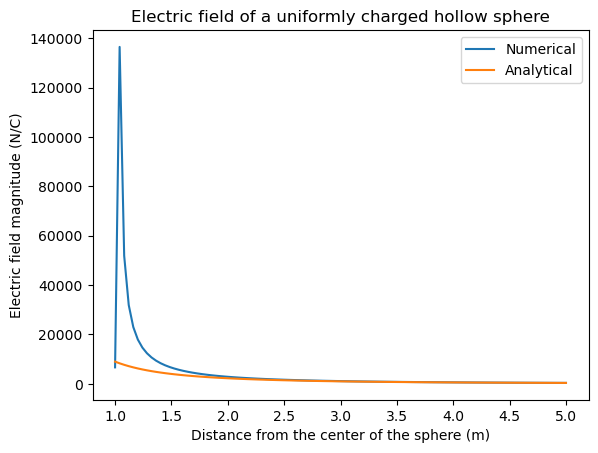

In [20]:
r_vals = np.linspace(R, 5*R, 100)

E_numerical_vals = np.zeros_like(r_vals)
E_analytical_vals = np.zeros_like(r_vals)
for r in r_vals:
    E_numerical = electric_field_numerical_hollow_sphere(Q, R, r)
    E_analytical = k * Q / r**2
    E_numerical_vals[r_vals == r] = np.linalg.norm(E_numerical)
    E_analytical_vals[r_vals == r] = E_analytical

plt.figure()
plt.plot(r_vals, E_numerical_vals, label='Numerical')
plt.plot(r_vals, E_analytical_vals, label='Analytical')
plt.xlabel('Distance from the center of the sphere (m)')
plt.ylabel('Electric field magnitude (N/C)')
plt.title('Electric field of a uniformly charged hollow sphere')
plt.legend()
plt.show()

## References

The plotting function was taken from the example problem given. I tweaked it a bit to use for a hollow sphere instead of a 2D disk.

Analytical solutions using Gauss's Law are built using the concepts discussed in the class module "Static Fields".